# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Usamah Putra Firdaus
- **Email:** usamahfirdaa@gmail.com
- **ID Dicoding:** Usamah Putra Firdaus

# Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Produk mana yang memiliki penjualan tertinggi dan terendah?
- Pertanyaan 2 : Bagaimana Tren Order di tiap bulan dari seluruh data yang ada?

# 1. Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# 2. Data Wrangling

## 2.1 Gathering Data

#### 2.1.1 Dataset Customer

In [4]:
url = "https://drive.google.com/file/d/1-4RusraZXCeYeBoR09WStcPgIKosZgJy/view?usp=sharing"
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
customers_df = pd.read_csv(download_url)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### 2.1.2 Dataset Geolocation

In [5]:
url = "https://drive.google.com/file/d/1IZiuIB39Zy7HmJtyxKm5EDF4gyngi9fW/view?usp=sharing"
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
geolocation_df = pd.read_csv(download_url)
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### 2.1.3 Dataset Order Item

In [6]:
url = "https://drive.google.com/file/d/1zvwKmMmISjKyEE7WLe04c63hh39H-SDA/view?usp=sharing"
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
order_items_df = pd.read_csv(download_url)
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### 2.1.4 Dataset Order Payment

In [7]:
url = "https://drive.google.com/file/d/1kWAys4ZON6ghAmLHDozMGomgnVN4izww/view?usp=sharing"
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
order_payments_df = pd.read_csv(download_url)
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### 2.1.5 Dataset Reviews

In [8]:
url = "https://drive.google.com/file/d/1LoTnB3CeBSCTTN_5M7sTuqiKN-dHBTj1/view?usp=sharing"
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
reviews_df = pd.read_csv(download_url)
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### 2.1.6 Dataset Orders

In [9]:
url = "https://drive.google.com/file/d/1-8MkZWshbFvkf1bgah9wCYeL5W9JckJr/view?usp=drive_link"
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
orders_df = pd.read_csv(download_url)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### 2.1.7 Dataset Product Category

In [10]:
url = "https://drive.google.com/file/d/11TFiTVcWGC6YO7dR7b7kh4w6mj8ztzt6/view?usp=drive_link"
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
product_category_df = pd.read_csv(download_url)
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### 2.1.8 Dataset Product

In [11]:
url = "https://drive.google.com/file/d/1S8uB1dQ35jMv58jnG68OuYQF9ZGNpQGs/view?usp=drive_link"
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
product_df = pd.read_csv(download_url)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### 2.1.9 Dataset Sellers

In [12]:
url = "https://drive.google.com/file/d/15NIiqFDrHynlrlO66o22ojkKj297_hIP/view?usp=drive_link"
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
sellers_df = pd.read_csv(download_url)
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## 3. Assesing Data

### 3.1.1 Dataset Customer

In [13]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [15]:
print('Jumlah Duplicate: ',customers_df.duplicated().sum())

Jumlah Duplicate:  0


In [16]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Terdapat keanehan pada kolom customer_city dan customer_state, yang seharusnya adalah menyebutkan nama kota dan negara, tetapi beberapa terdapat angka pada kolom tersebut

#### 3.1.2 Dataset Geolocation

In [17]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [18]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [19]:
print('Jumlah Duplicate: ', geolocation_df.duplicated().sum())

Jumlah Duplicate:  261831


Terdapat 261831 data yang duplicate

In [20]:
geolocation_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


Terdapat keanehan pada kolom geolocation_city dan geolocation_state, yang seharusnya adalah menyebutkan nama kota dan negara, tetapi beberapa terdapat angka pada kolom tersebut

#### 3.1.3 Dataset Order Items

In [21]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Pada kolom shipping_limit_date terdapat kesalahan tipe data, yang seharusnya adalah datetime

In [22]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [23]:
print('Jumlah duplicate: ', order_items_df.duplicated().sum())

Jumlah duplicate:  0


In [24]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### 3.1.4 Dataset Order Payment

In [25]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [27]:
print('Jumlah duplicate: ', order_payments_df.duplicated().sum())

Jumlah duplicate:  0


In [28]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Setelah dilakukan pengecekan kesalahan umum, data Order Payments tidak ada kesalahan nilai

#### 3.1.5 Dataset Reviews

In [29]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Terdapat kesalahan tipe data pada kolom review_creation_date dan  review_answer_timestamp

In [30]:
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Pada kolom review_comment_title dan review_comment_message memiliki cukup banyak nilai yang kosong

In [31]:
print('Jumlah duplicate: ', reviews_df.duplicated().sum())

Jumlah duplicate:  0


In [32]:
reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### 3.1.6 Dataset Orders

In [33]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [34]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat kesalahan tipe data pada kolom order_purchase_timestamp, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date yang seharusnya adalah datetime

In [35]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat null value di beberapa kolom yaitu order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date 

In [36]:
print('Jumlah duplicate: ', orders_df.duplicated().sum())

Jumlah duplicate:  0


In [37]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### 3.1.7 Dataset Product Category

In [38]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [39]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [40]:
print('Jumlah duplicate: ', product_category_df.duplicated().sum())

Jumlah duplicate:  0


In [41]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Setelah dilakukan pengecekan kesalahan umum, data Product Category tidak ada kesalahan nilai

#### 3.1.8 Dataset Product

In [42]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [43]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Beberapa kolom pada data product memiliki cukup banyak nilai yang null values

In [44]:
print('Jumlah Duplicate: ', product_df.duplicated().sum())

Jumlah Duplicate:  0


In [45]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### 3.1.9 Dataset Sellers

In [46]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [47]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [48]:
print('Jumlah duplicate: ', sellers_df.duplicated().sum())

Jumlah duplicate:  0


In [49]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Setelah dilakukan pengecekan kesalahan umum, data Sellers tidak ada kesalahan nilai

## 4. Cleaning Data

### 4.1 Menghapus data duplicate

#### 4.1.1 Handling data duplicate (Dataset Geolocation)

In [50]:
print('Jumlah Duplicate: ', geolocation_df.duplicated().sum())

Jumlah Duplicate:  261831


Dataset Geolocation memiliki jumlah duplicate yang banyak, sehingga perlu dihapus agar data menjadi lebih valid

In [51]:
geolocation_df.drop_duplicates(inplace=True)

In [52]:
print('Jumlah Duplicate: ', geolocation_df.duplicated().sum())


Jumlah Duplicate:  0


Dataset Geolocation telah bersih

### 4.2 Mengubah Tipe Data

#### 4.2.1 Mengubah Tipe Data (Dataset Orders) 

In [53]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [54]:
orders_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date', 
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for column in orders_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [55]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Perubahan tipe data pada dataset orders telah berhasil

#### 4.2.2 Mengubah Tipe Data (Dataset Orders Items) 

In [56]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [57]:
order_items_columns = ['shipping_limit_date']

for column in order_items_columns:
    order_items_df[column] = pd.to_datetime(order_items_df[column])

In [58]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Perubahan tipe data pada dataset orders items telah berhasil

#### 4.2.3 Mengubah Tipe Data (Dataset Orders Reviews)

In [59]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [60]:
reviews_columns = ['review_creation_date', 'review_answer_timestamp']

for column in reviews_columns:
    reviews_df[column] = pd.to_datetime(reviews_df[column])

In [61]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Perubahan tipe data pada dataset orders Reviews telah berhasil

### 5.1 Handling Null Values

#### 5.1.1 Handling Null Values (Dataset Orders Reviews)

In [62]:
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Karena pada kolom review_comment_title dan review_comment_message bersifat text, maka handling yang dilakukan dengan cara berikut :
- Mengubah nilai null pada column review_comment_title dengan "No Title"
- Mengubah nilai null pada column review_comment_message  dengan "No Comment"

In [63]:
reviews_df["review_comment_title"].fillna("No Title", inplace=True)
reviews_df["review_comment_message"].fillna("No Comment", inplace=True)

C:\Users\usama\AppData\Local\Temp\ipykernel_18632\3708572257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews_df["review_comment_title"].fillna("No Title", inplace=True)
C:\Users\usama\AppData\Local\Temp\ipykernel_18632\3708572257.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [64]:
reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Handling null values pada dataset orders reviews telah berhasil

#### 5.1.2 Handling Null Values (Dataset Orders dan Product)

In [65]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [66]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Pada Null Values dari Dataset Orders dan Product saya biarkan, karena data yang null adalah data penting, sehingga tidak bisa diganti 

## 6. Exploratory Data Analysis (EDA)

### 6.1 Explore Data

#### 6.1.1 Data Customer

In [67]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [68]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [69]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Dapat diketahui bahwa Sao Paulo mendaptkan customer paling banyak

#### 6.1.2 Data Order Payments

In [70]:
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [71]:
order_payments_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

Dapat diketahui bahwa customer paling sering membayar menggunakan Credit Card

### 6.2 Merge Data

#### 6.2.1 customer_df dengan orders_df

In [72]:
customer_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
customer_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [73]:
customer_orders_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

customer terbanyak berada di kota Sao Paulo

#### 6.2.2 product_df dengan product_category_df

In [74]:
df_product = pd.merge(
    left=product_df,
    right=product_category_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)
df_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [75]:
df_product.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False)

product_category_name_english
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
home_comfort_2                  5
fashion_childrens_clothes       5
security_and_services           2
cds_dvds_musicals               1
Name: product_id, Length: 71, dtype: int64

Dapat diketahui product category yang paling banyak terjual adalah bed_bath_table

#### 6.2.3 customer_orders_df dengan order_payments_df

In [76]:
customer_payments_df = pd.merge(
    left=customer_orders_df,
    right=order_payments_df,
    how='left',
    left_on= 'order_id',
    right_on= 'order_id'
)
customer_payments_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25


In [77]:
customer_payments_df.groupby(by='payment_type').customer_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: customer_id, dtype: int64

Dapat diketahui bahwa customer lebih sering melakukan pembayaran menggunakan Credit Card

#### 6.2.4 customer_payments_df dengan order_items_df

In [78]:
df_customers = pd.merge(
    left=customer_payments_df,
    right=order_items_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


#### 6.2.5 df_customer dengan df_product

In [79]:
customer_product_df = pd.merge(
    left=df_customers,
    right=df_product,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
customer_product_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


#### 6.2.6 customer_product_df dengan sellers_df

In [80]:
customer_product_sellers_df = pd.merge(
    left=customer_product_df,
    right=sellers_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
customer_product_sellers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,14940.0,ibitinga,SP


#### 6.2.7 customer_product_sellers_df dengan reviews_df

In [81]:
all_data = pd.merge(
    left=customer_product_sellers_df,
    right=reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,office_furniture,8577.0,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,housewares,88303.0,itajai,SC,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,office_furniture,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,office_furniture,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,home_confort,14940.0,ibitinga,SP,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


In [82]:
all_data.describe()

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_installments,payment_value,order_item_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,review_score,review_creation_date,review_answer_timestamp
count,119143.000000,119143,118966,117057,115722,119143,119140.000000,119140.000000,119140.000000,118310.000000,...,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000,118146.000000,118146,118146
mean,35033.451298,2017-12-29 18:36:13.115760384,2017-12-30 04:49:18.425726720,2018-01-03 08:24:34.395525376,2018-01-12 20:55:38.199616256,2018-01-22 15:21:10.241642496,1.094737,2.941246,172.735135,1.196543,...,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413,4.015582,2018-01-11 13:17:50.103092736,2018-01-14 17:00:35.769302528
min,1003.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000,0.000000,0.000000,1.000000,...,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,11250.000000,2017-09-10 20:15:46,2017-09-11 15:50:48.500000,2017-09-14 19:52:12,2017-09-22 21:54:31.249999872,2017-10-02 00:00:00,1.000000,1.000000,60.850000,1.000000,...,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,4.000000,2017-09-22 00:00:00,2017-09-25 11:15:40.750000128
50%,24240.000000,2018-01-17 11:59:12,2018-01-17 16:49:49,2018-01-23 17:03:08,2018-02-01 03:17:55,2018-02-14 00:00:00,1.000000,2.000000,108.160000,1.000000,...,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,5.000000,2018-02-01 00:00:00,2018-02-03 12:04:23
75%,58475.000000,2018-05-03 13:18:30,2018-05-03 16:56:53,2018-05-07 14:57:00,2018-05-15 00:08:31.500000,2018-05-25 00:00:00,1.000000,4.000000,189.240000,1.000000,...,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000,5.000000,2018-05-15 00:00:00,2018-05-17 10:48:59
max,99990.000000,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,29.000000,24.000000,13664.080000,21.000000,...,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,29823.198969,NaN,NaN,NaN,NaN,NaN,0.730141,2.777848,267.776077,0.699489,...,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511,1.400436,NaN,NaN


#### **Pada Dataset Geolocation tidak digabungkan, karena dataset tersebut tidak dilakukan analisis lebih lanjut**

## 7. Visualisasi Data

### 7.1 Produk mana yang memiliki penjualan tertinggi dan terendah?

In [83]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

In [84]:
counts_product_name = all_data.groupby(by='product_category_name_english').product_id.count().sort_values(ascending=False).reset_index()
counts_product_name

,product_category_name_english,product_id
0,bed_bath_table,11988
1,health_beauty,10032
2,sports_leisure,9004
3,furniture_decor,8832
4,computers_accessories,8150
...,...,...
66,arts_and_craftmanship,24
67,la_cuisine,16
68,cds_dvds_musicals,14
69,fashion_childrens_clothes,8


C:\Users\usama\AppData\Local\Temp\ipykernel_18632\3114087338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_id', y='product_category_name_english', data= counts_product_name.head(5), palette=colors, ax=ax[0])
C:\Users\usama\AppData\Local\Temp\ipykernel_18632\3114087338.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_id', y='product_category_name_english', data=counts_product_name.sort_values(by='product_id', ascending=True).head(5), palette=colors, ax=ax[1])


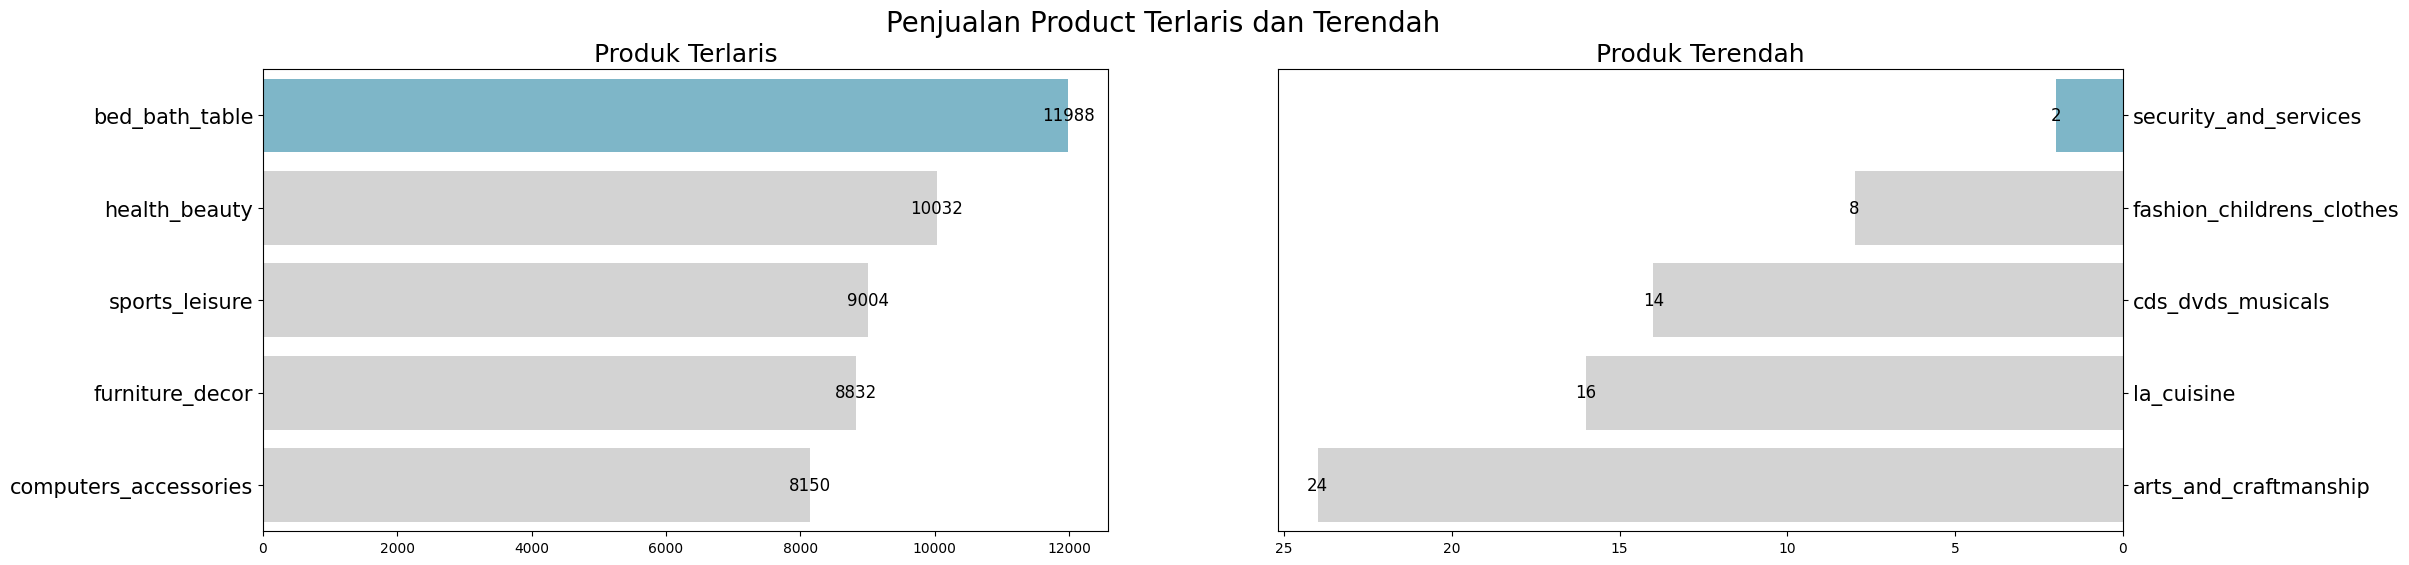

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='product_id', y='product_category_name_english', data= counts_product_name.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Produk Terlaris', loc='center', fontsize= 18)
ax[0].tick_params(axis= 'y', labelsize =15)

for i, value in enumerate(counts_product_name.head(5)['product_id']):
    ax[0].text(value, i, f'{value}', ha='center', va='center', fontsize =12, color= 'black')


sns.barplot(x='product_id', y='product_category_name_english', data=counts_product_name.sort_values(by='product_id', ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title('Produk Terendah', loc='center', fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

for i, value in enumerate(counts_product_name.sort_values(by='product_id', ascending=True).head(5)['product_id']):
    ax[1].text(value, i, f'{value}', ha='center', va= 'center', fontsize= 12, color= 'black')

plt.suptitle('Penjualan Product Terlaris dan Terendah', fontsize = 20)
plt.show()

### 7.2 Bagaimana Tren Order tiap tahunnya?

In [86]:
monthly_df = all_data.resample(rule='M', on='order_approved_at').agg({
    "order_id": "size",
})
monthly_df

C:\Users\usama\AppData\Local\Temp\ipykernel_18632\805985346.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = all_data.resample(rule='M', on='order_approved_at').agg({


,order_id
order_approved_at,
2016-09-30,3
2016-10-31,398
2016-11-30,0
2016-12-31,1
2017-01-31,984
2017-02-28,2104
2017-03-31,3263
2017-04-30,2845
2017-05-31,4471


Pada hasil diatas, dapat dilihat bahwa hanya tahun 2017 saja yang memiliki data yang lengkap di setiap bulannya, sehingga saya akan menjumlahakan order di setiap bulan yang sama dari semua data yang ada

In [100]:
monthly_df.index = monthly_df.index.strftime('%B')
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_df

,order_approved_at,order_count
0,September,3
1,October,398
2,November,0
3,December,1
4,January,984
5,February,2104
6,March,3263
7,April,2845
8,May,4471
9,June,3863


In [101]:
monthly_df = monthly_df.groupby('order_approved_at', as_index=False).agg({
    'order_count': 'sum'
})

In [102]:
monthly_df

,order_approved_at,order_count
0,April,10920
1,August,12958
2,December,6847
3,February,10145
4,January,9525
5,July,12121
6,June,11254
7,March,11968
8,May,12968
9,November,9017


In [103]:
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_df["month_conversion"] = monthly_df["order_approved_at"].map(month_mapping)
monthly_df = monthly_df.sort_values("month_conversion")
monthly_df = monthly_df.drop("month_conversion", axis=1)

In [104]:
monthly_df

,order_approved_at,order_count
4,January,9525
3,February,10145
7,March,11968
0,April,10920
8,May,12968
6,June,11254
5,July,12121
1,August,12958
11,September,5215
10,October,6028


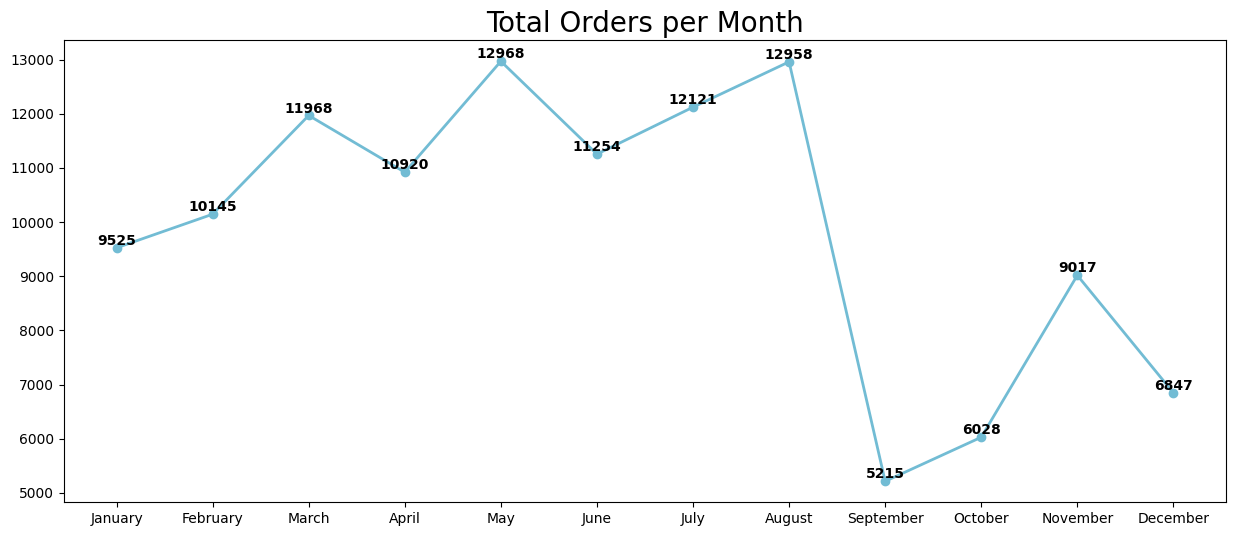

In [107]:
plt.figure(figsize=(15, 6))
plt.plot(
    monthly_df["order_approved_at"],
    monthly_df["order_count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Orders per Month", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i, txt in enumerate(monthly_df["order_count"]):
    plt.text(
        monthly_df["order_approved_at"].iloc[i],
        txt,
        f'{txt}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.show()

Dari hasil visualisasi tersebut, data orders dari tahun 2016 hingga 2018, performa terbaik berada di bulan May, dan Agustus. Sedangkan performa yang kurang pada bulan september, oktober, dan december

## RFM Analysis

In [108]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

In [109]:
rfm_df = all_data.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "count", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_data["order_purchase_timestamp"].dropna().max().date()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days if pd.notna(x) else None)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()


,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


pada data customer_id nilainya masih nilai acak (encode) sehingga ketika dilakukan visualisasi data hasilnya kurang bagus, maka akan dirubah untuk sementara

In [110]:
rfm_data = rfm_df.copy()
rfm_data["customer_id"] = range(1, len(rfm_data) + 1)


In [111]:
rfm_data

,customer_id,frequency,monetary,recency
0,1,1,89.80,337
1,2,1,54.90,458
2,3,1,179.99,596
3,4,1,149.90,427
4,5,1,93.00,198
...,...,...,...,...
99436,99437,3,164.70,202
99437,99438,1,47.90,148
99438,99439,1,199.90,126
99439,99440,2,21.80,410


C:\Users\usama\AppData\Local\Temp\ipykernel_18632\3150271942.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='recency', x='customer_id', data=data_recency, palette=colors, ax=ax[0])
C:\Users\usama\AppData\Local\Temp\ipykernel_18632\3150271942.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30, fontsize=12)
C:\Users\usama\AppData\Local\Temp\ipykernel_18632\3150271942.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=data_frequency, palette=colors, ax=ax[1])
C:\Users\usama\AppData\Local\Temp\ipykernel_18

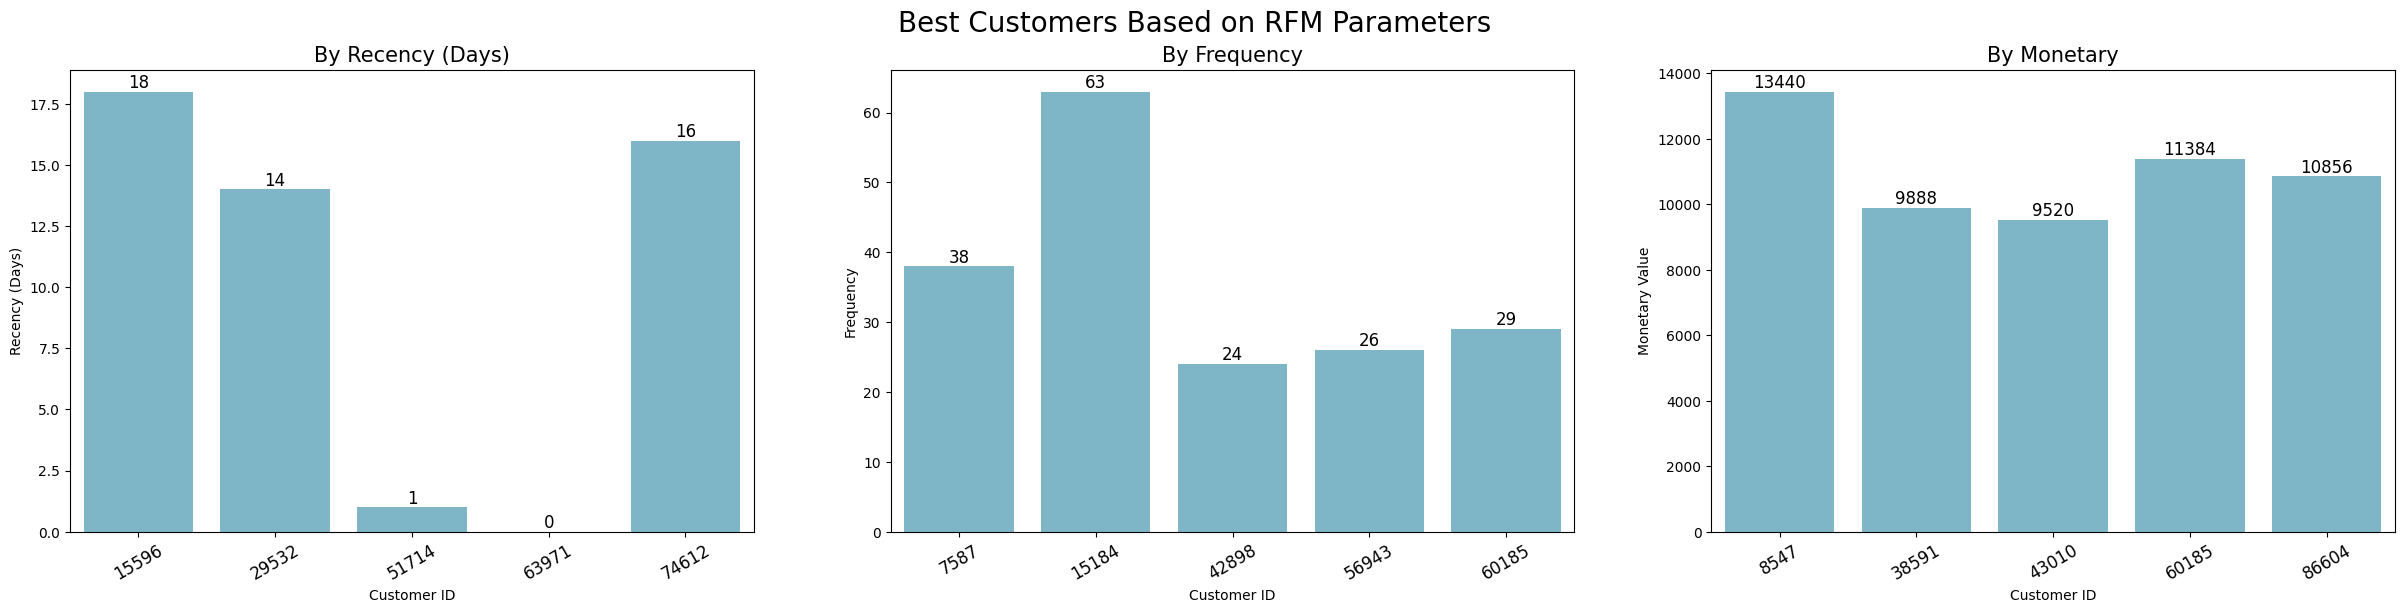

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4"] * 5

# Recency
data_recency = rfm_data.sort_values(by='recency', ascending=True).head(5)
sns.barplot(y='recency', x='customer_id', data=data_recency, palette=colors, ax=ax[0])
ax[0].set_ylabel("Recency (Days)")
ax[0].set_xlabel("Customer ID")
ax[0].set_title("By Recency (Days)", fontsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30, fontsize=12)
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='bottom', fontsize=12, color='black')

# Frequency
data_frequency = rfm_data.sort_values(by="frequency", ascending=False).head(5)
sns.barplot(y="frequency", x="customer_id", data=data_frequency, palette=colors, ax=ax[1])
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("Customer ID")
ax[1].set_title("By Frequency", fontsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, fontsize=12)
for p in ax[1].patches:
    ax[1].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='bottom', fontsize=12, color='black')

# Monetary
data_monetary = rfm_data.sort_values(by="monetary", ascending=False).head(5)
sns.barplot(y="monetary", x="customer_id", data=data_monetary, palette=colors, ax=ax[2])
ax[2].set_ylabel("Monetary Value")
ax[2].set_xlabel("Customer ID")
ax[2].set_title("By Monetary", fontsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=30, fontsize=12)
for p in ax[2].patches:
    ax[2].annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='bottom', fontsize=12, color='black')


plt.suptitle("Best Customers Based on RFM Parameters", fontsize=20)
plt.show()


- **Recency** : customer dengan ID 63971 adalah customer yang melakukan order hari ini (pada tanggal analisis dilakukan), sedangkan customer dengan ID 15596 melakukan order paling lama
- **Frequency** : customer dengan ID 15184 adalah customer yang paling sering melakukan order, sedangkan customer dengan ID 81895 paling sedikit melakukan order
- **Monetary** : customer dengan ID 8547 adalah customer paling banyak menghabiskan uang untuk melakukan order, sedangkan customer dengan ID 43010 paling sedikit menghabiskan uang untuk melakukan order  

## 8. Merge Data rfm_df dengan all_data

In [97]:
all_df = pd.merge(
    left=all_data,
    right=rfm_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
all_df.head()

In [98]:
all_df.to_csv("all_data.csv", index=False)

In [99]:
all_df.info()

# Conclution

**Pertanyaan 1 : Produk mana yang memiliki penjualan tertinggi dan terendah?**

- Berdasarkan hasil analisis dan visualisasi yang telah dilakukan, produk bed_bath_table merupakan yang paling diminati dengan total penjualan mencapai 11.988 item. Hal ini disebabkan karena produk tersebut merupakan kebutuhan utama dalam sebuah rumah, sehingga permintaannya tinggi. Sementara itu, produk dengan penjualan terendah adalah security_and_service, karena kurang diminati dan tidak termasuk dalam kebutuhan utama.

**Pertanyaan 2 : Bagaimana Tren Order tiap tahunnya?**
- Dari hasil visualisasi tersebut, data orders dari tahun 2016 hingga 2018, performa terbaik berada di bulan May, dan Agustus yang mencapai hampir 13 rb orders. Sedangkan performa yang kurang pada bulan september, oktober, dan december